In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import librosa.display
import librosa
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow.keras.layers as layers
import IPython.display as ipd

In [ ]:

    ### Let's read a sample audio using librosa
import librosa
audio_file_path="/content/dog_test.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[-2.8719089e-08  3.1861163e-08 -3.2431657e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 1517)


In [ ]:
a=[]
a.append(mfccs)

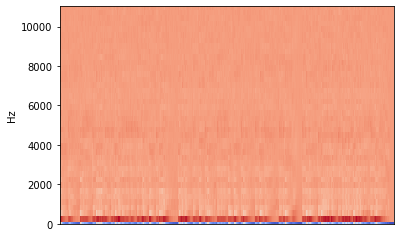

In [ ]:
librosa.display.specshow(mfccs, y_axis='linear')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
dataset = []
cla=[]
genres = {'cat': 0, 'dog_barking': 1}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'/content/drive/MyDrive/catsANDdogs/{genre}'):
        songname = f'/content/drive/MyDrive/catsANDdogs/{genre}/{filename}'
        for index in range(14):
            audio, sr = librosa.load(songname)
            mfcc_fea = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T,axis=0)
            fea_class=genre
            dataset.append(mfcc_fea)
            cla.append(fea_class)

In [ ]:
d = {'Features':dataset,'class':cla}

In [ ]:
import pandas as pd
extracted_features_df=pd.DataFrame(d)
extracted_features_df.head()

,Features,class
0,"[-163.72688, 161.08112, -70.27767, 22.36542, -...",cat
1,"[-163.72688, 161.08112, -70.27767, 22.36542, -...",cat
2,"[-163.72688, 161.08112, -70.27767, 22.36542, -...",cat
3,"[-163.72688, 161.08112, -70.27767, 22.36542, -...",cat
4,"[-163.72688, 161.08112, -70.27767, 22.36542, -...",cat


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(dataset)
#(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(3878, 40)

In [ ]:
y

array(['cat', 'cat', 'cat', ..., 'dog_barking', 'dog_barking',
       'dog_barking'], dtype='<U11')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(3102, 40)

In [ ]:
X_test.shape

(776, 40)

In [ ]:
y_train.shape

(3102, 2)

In [ ]:
y_test.shape

(776, 2)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],10,4,1))
X_test=np.reshape(X_test,(X_test.shape[0],10,4,1))

In [ ]:
INPUTSHAPE = (10,4,1)

In [ ]:
model = Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.GlobalAveragePooling2D(),
                          layers.Flatten(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(2 , activation = 'softmax')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 2, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 1, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 67,394
Trainable params: 67,394
Non-trainable params: 0
____________________________________________________

In [ ]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
#checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                             # verbose=1, save_best_only=True)
history = model.fit(X_train,y_train ,validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/40
388/388 [==============================] - 2s 4ms/step - loss: 0.3368 - acc: 0.8856 - val_loss: 0.1620 - val_acc: 0.9394
Epoch 2/40
388/388 [==============================] - 1s 3ms/step - loss: 0.0856 - acc: 0.9720 - val_loss: 0.0491 - val_acc: 0.9910
Epoch 3/40
388/388 [==============================] - 2s 4ms/step - loss: 0.0727 - acc: 0.9739 - val_loss: 0.0191 - val_acc: 1.0000
Epoch 4/40
388/388 [==============================] - 1s 4ms/step - loss: 0.0125 - acc: 0.9977 - val_loss: 0.0224 - val_acc: 0.9936
Epoch 5/40
388/388 [==============================] - 1s 3ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 6/40
388/388 [==============================] - 2s 5ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 7/40
388/388 [==============================] - 2s 6ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 8/40
388/388 [==============================] - 2s 4ms/step - loss: 7.

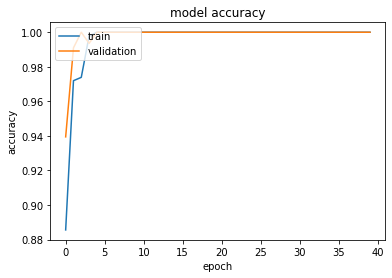

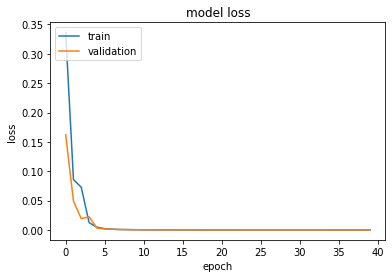

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0) 
print(test_accuracy[1])

1.0


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_pred=model.predict(X_test)

25/25 [==============================] - 0s 2ms/step


In [ ]:
round_off=np.round_(y_pred)

Confusion Matrix
[[464   0]
 [  0 312]]


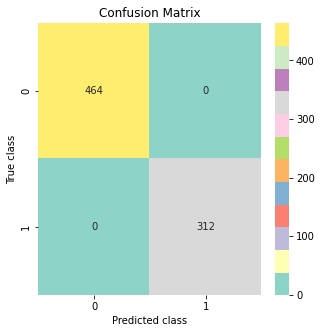

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [ ]:
mydict = {'cat': 0, 'dog_barking': 1}
import librosa
audio_file_path="/content/dog_test.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T,axis=0)
x=[]
x.append(mfccs)
x=np.array(x)
x=np.reshape(x,(x.shape[0],10,4,1))
y_pre=model.predict(x)
y_pre=np.round_(y_pre)
a,b=np.where(y_pre==1)
for gerne, classs in mydict.items(): 
    if classs == b[0]:
        print(gerne)

1/1 [==============================] - 0s 27ms/step
dog_barking
